# Import libraries

In [1]:
import pandas as pd
from sqlalchemy import create_engine, text
from utils.db import get_inspect_database_uri
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the database and get the blocks table

In [2]:
conn = create_engine(get_inspect_database_uri()).connect()
# post merge
query = f"SELECT * FROM blocks WHERE block_number > 15537393"
blocks_df = pd.DataFrame(conn.execute(text(query)))

# Preprocess the data
 
Fix column types and sort by block number

In [3]:
blocks_df.sort_values(by="block_number", ascending=True, inplace=True)
blocks_df["gas_fee"] = blocks_df["gas_fee"].astype(float)
blocks_df["coinbase_transfer"] = blocks_df["coinbase_transfer"].astype(float)
blocks_df["gas_limit"] = blocks_df["gas_limit"].astype(float)
blocks_df["base_fee_per_gas"] = blocks_df["base_fee_per_gas"].astype(float)
blocks_df["base_fee_per_gas"] = blocks_df["base_fee_per_gas"] * 1e9 # convert to GWei
blocks_df["gas_used"] = blocks_df["gas_used"].astype(float)
blocks_df["tx_count"] = blocks_df["tx_count"].astype(int)

In [4]:
blocks_df.describe()

,block_number,coinbase_transfer,base_fee_per_gas,gas_fee,gas_used,gas_limit,tx_count
count,2.959639e+06,2.959639e+06,2.959639e+06,2.959639e+06,2.959639e+06,2.959639e+06,2.959639e+06
mean,1.701721e+07,3.808966e-03,2.365291e+01,7.936517e-02,1.514901e+07,2.999957e+07,1.469115e+02
std,8.543748e+05,6.460576e+00,2.137721e+01,3.818439e-01,6.057650e+06,3.781412e+03,6.435960e+01
min,1.553739e+07,0.000000e+00,1.706518e+00,0.000000e+00,0.000000e+00,2.988296e+07,0.000000e+00
25%,1.627730e+07,0.000000e+00,1.252620e+01,2.406913e-02,1.134346e+07,3.000000e+07,1.150000e+02
50%,1.701721e+07,0.000000e+00,1.754110e+01,3.990323e-02,1.392860e+07,3.000000e+07,1.370000e+02
75%,1.775712e+07,0.000000e+00,2.775786e+01,7.339088e-02,1.768106e+07,3.000000e+07,1.640000e+02
max,1.849703e+07,1.111441e+04,8.132266e+02,1.822103e+02,3.002708e+07,3.002930e+07,1.410000e+03


In [5]:
FONT_SIZE = 14

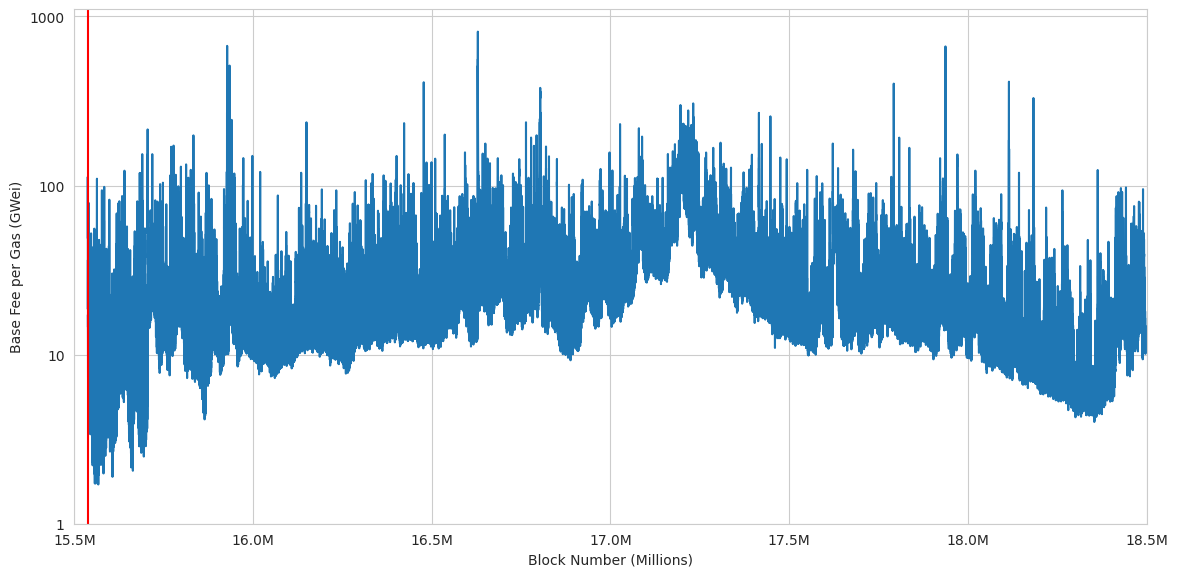

In [6]:
# Set seaborn style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(blocks_df['block_number'], blocks_df['base_fee_per_gas'])
plt.xlabel('Block Number (Millions)')
# draw a vertical line on block 15537393 and name it the Merge block
plt.axvline(x=15537393, color='r', linestyle='-', label='Merge Block')
plt.xticks(ticks=[15e6, 15.5e6, 16e6, 16.5e6, 17e6, 17.5e6, 18e6, 18.5e6, 19e6], labels=[f"{label/1e6}M" for label in plt.xticks()[0]])
plt.ylabel('Base Fee per Gas (GWei)')
# plt.title('Logarithmic Base Fee per Gas for Blocks')
plt.grid(True)
plt.yscale('log')  # Set y-axis to a logarithmic scale
plt.yticks(ticks=[1, 10, 100, 1000], labels=["1", "10", "100", "1000"])
plt.xlim(15.5e6, 18.5e6)
# Adjust font sizes for a technical paper
plt.rcParams.update({'font.size': FONT_SIZE, 'font.family': 'serif', 'font.serif': 'Times New Roman', 'text.usetex': True})

plt.tight_layout()  # Add padding to the plot
plt.savefig('./plots/base_fee_per_block.png', dpi=300)  # Save the plot as an image
plt.show()

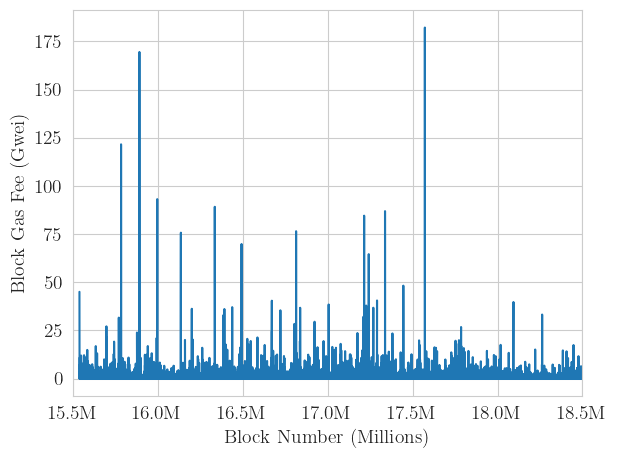

In [7]:
# Set seaborn style
sns.set_style("whitegrid")

# Plotting
# plt.scatter(blocks_df['block_number'], blocks_df['gas_fee'], s=1, c='r', marker='.', alpha=0.5)
plt.plot(blocks_df['block_number'], blocks_df['gas_fee'])
plt.xlabel('Block Number (Millions)')
plt.xticks(ticks=[15e6, 15.5e6, 16e6, 16.5e6, 17e6, 17.5e6, 18e6, 18.5e6, 19e6], labels=[f"{label/1e6}M" for label in plt.xticks()[0]])
plt.ylabel('Block Gas Fee (Gwei)')
# plt.title('Gas Fee per Blocks')
plt.grid(True)
plt.xlim(15.5e6, 18.5e6)

# Adjust font sizes for a technical paper
plt.rcParams.update({'font.size': FONT_SIZE, 'font.family': 'serif', 'font.serif': 'Times New Roman', 'text.usetex': True})

plt.tight_layout()  # Add padding to the plot
plt.savefig('./plots/gas_fee_per_block.png', dpi=300)  # Save the plot as an image
plt.show()

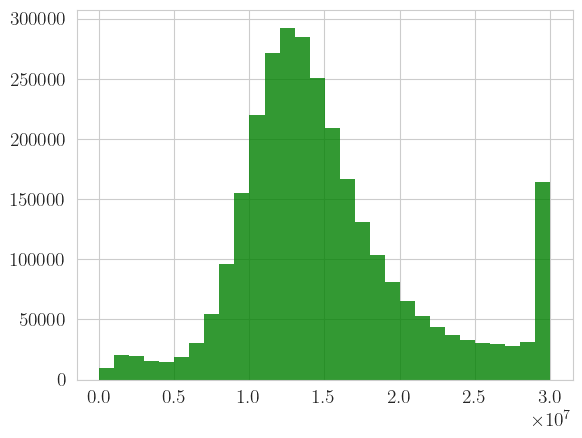

In [8]:
# Compute the histogram
counts, bins, _ = plt.hist(blocks_df['gas_used'], bins=30, alpha=0.8, label='Gas Used', histtype='stepfilled', edgecolor='none', hatch='/', color='g')
# Convert counts to percentages
total_samples = len(blocks_df['gas_used'])
percentage = counts / total_samples * 100

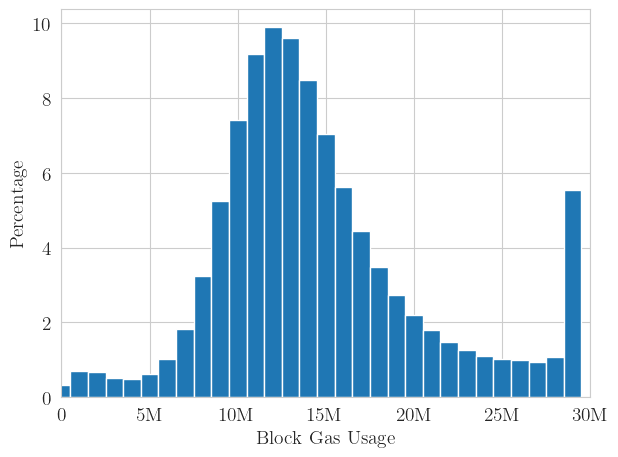

In [9]:
# Set seaborn style
sns.set_style("whitegrid")

# Plotting
plt.bar(bins[:-1], percentage, width=1e6)
plt.xlabel('Block Gas Usage')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 5e6, 10e6, 15e6, 20e6, 25e6, 30e6], labels=["0", "5M", "10M", "15M", "20M", "25M", "30M"])
plt.xlim(0, 30e6)
plt.grid(True)

# Adjust font sizes for a technical paper
plt.rcParams.update({'font.size': FONT_SIZE, 'font.family': 'serif', 'font.serif': 'Times New Roman', 'text.usetex': True})

plt.tight_layout()  # Add padding to the plot
plt.savefig('./plots/gas_uasge_per_block_hist.png', dpi=300)  # Save the plot as an image
plt.show()

In [10]:
# create a table of the 10 top miners with empty blocks i.e. gas used is 0
empty_blocks = blocks_df[blocks_df['gas_used'] == 0]['miner_address'].value_counts().head(10)
empty_blocks

miner_address
0x388C818CA8B9251b393131C08a736A67ccB19297    283
0x4675C7e5BaAFBFFbca748158bEcBA61ef3b0a263    269
0xE887312c0595a10aC88e32ebb8e9F660Ad9aB7F7    244
0xeD33259a056F4fb449FFB7B7E2eCB43a9B5685Bf    147
0x05295a0aC05d2165B061CD44907C53b7A85E95fF     82
0x0000000000000000000000000000000000000001     52
0x0000000000000000000000000000000000000000     44
0xd4E96eF8eee8678dBFf4d535E033Ed1a4F7605b7     34
0xeBec795c9c8bBD61FFc14A6662944748F299cAcf     31
0x2f777e9f26aa138ED21C404079E80656b448C711     29
Name: count, dtype: int64

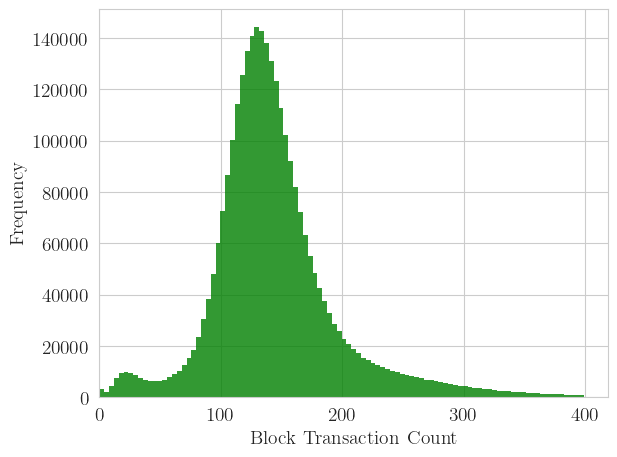

In [11]:
# Set seaborn style
sns.set_style("whitegrid")

# Plotting
counts, bins, _ = plt.hist(blocks_df[blocks_df['tx_count'] < 400]['tx_count'], bins=100, alpha=0.8, label='Tx Count', histtype='stepfilled', edgecolor='none', hatch='/', color='g')
plt.xlabel('Block Transaction Count')
plt.ylabel('Frequency')
plt.xlim(0)
plt.grid(True)

# Adjust font sizes for a technical paper
plt.rcParams.update({'font.size': FONT_SIZE, 'font.family': 'serif', 'font.serif': 'Times New Roman', 'text.usetex': True})

plt.tight_layout()  # Add padding to the plot
plt.savefig('./plots/tx_count_per_block.png', dpi=300)  # Save the plot as an image
plt.show()

In [12]:
NAIVE = 0
ESCROW = 1

CONGEST_TX_GAS_USAGE = 60000
TARGET_GAS_USAGE = 15e6
GAS_LIMIT = 30e6
PHI = 1 / 8


def calculate_congestion_cost(method, block_range, gas_price, gas_usage, base_fee_per_gas):
    base_fee_per_gas /= 1e9  # convert to ETH
    cost = 0
    if method == NAIVE:
        for block in range(block_range):
            cost += (gas_price + base_fee_per_gas) * GAS_LIMIT
            base_fee_per_gas = base_fee_per_gas * (1 + PHI)  # 12.5% increase for full blocks
    elif method == ESCROW:
        for block in range(block_range):
            # Cost for the congestor (base fee + gas bribe to miner)
            cost += (gas_price + base_fee_per_gas) * GAS_LIMIT
            # cost += (gas_price + base_fee_per_gas) * (gas_usage + CONGEST_TX_GAS_USAGE)
            # EIP-1559 base fee update
            base_fee_per_gas = base_fee_per_gas * (
                        1 + PHI * (CONGEST_TX_GAS_USAGE - TARGET_GAS_USAGE) / TARGET_GAS_USAGE)

    return cost

In [13]:
# Calculate the congestion cost for the naive method
mean_reward = blocks_df["gas_fee"].mean()
mean_gas_usage = blocks_df["gas_used"].mean()
mean_base_fee_per_gas = blocks_df["base_fee_per_gas"].mean()
mean_gas_price = (blocks_df['gas_fee'] / blocks_df['gas_used']).mean()

for block_range in [1, 2, 5, 10, 50, 100]:
    naive_cost = calculate_congestion_cost(NAIVE, block_range, mean_gas_price, 30e6, mean_base_fee_per_gas)
    print(f"Naive cost for {block_range} blocks: {naive_cost}")


Naive cost for 1 blocks: 0.863857195317487
Naive cost for 2 blocks: 1.8164128118740344
Naive cost for 5 blocks: 5.324246018790149
Naive cost for 10 blocks: 14.30006318053927
Naive cost for 50 blocks: 2051.88633877555
Naive cost for 100 blocks: 740208.0932408689


In [14]:
# Calculate the gas price of the blocks with gas fee of the 75th percentile
comp_high_gas_price = blocks_df[blocks_df['gas_fee'] > blocks_df['gas_fee'].quantile(0.75)]['gas_fee'] / blocks_df[blocks_df['gas_fee'] > blocks_df['gas_fee'].quantile(0.75)]['gas_used']

comp_med_gas_price = blocks_df[blocks_df['gas_fee'] > blocks_df['gas_fee'].quantile(0.50)]['gas_fee'] / blocks_df[blocks_df['gas_fee'] > blocks_df['gas_fee'].quantile(0.50)]['gas_used']


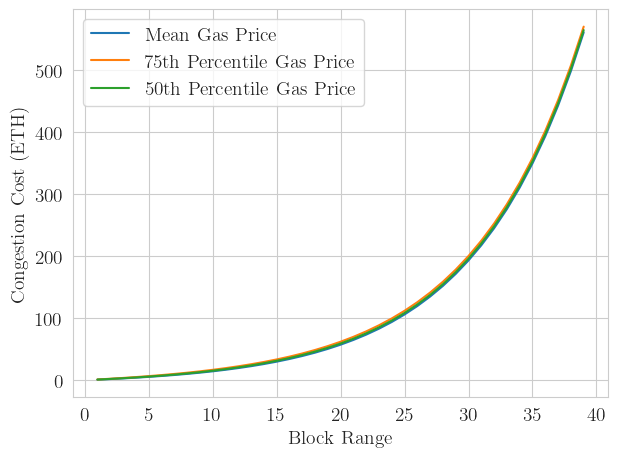

In [15]:
# plot the naive cost per block range per each the mean gas price and the mean base fee per gas
escrow_costs_mean = []
escrow_costs_high = []
escrow_costs_med = []
RANGE = 40
for block_range in range(1, RANGE):
    naive_cost = calculate_congestion_cost(NAIVE, block_range, mean_gas_price, 30e6, mean_base_fee_per_gas)
    high_cost = calculate_congestion_cost(NAIVE, block_range, comp_high_gas_price.mean(), 30e6, mean_base_fee_per_gas)
    med_cost = calculate_congestion_cost(NAIVE, block_range, comp_med_gas_price.mean(), 30e6, mean_base_fee_per_gas)
    escrow_costs_mean.append(naive_cost)
    escrow_costs_high.append(high_cost)
    escrow_costs_med.append(med_cost)

# plot the naive cost per block range per each the mean gas price and the mean base fee per gas
plt.plot(range(1, RANGE), escrow_costs_mean, label='Mean Gas Price')
plt.plot(range(1, RANGE), escrow_costs_high, label='75th Percentile Gas Price')
plt.plot(range(1, RANGE), escrow_costs_med, label='50th Percentile Gas Price')
plt.xlabel('Block Range')
plt.ylabel('Congestion Cost (ETH)')
# plt.title('Naive Congestion Cost per Block Range')
plt.legend()
plt.grid(True)

# Adjust font sizes for a technical paper
plt.rcParams.update({'font.size': FONT_SIZE, 'font.family': 'serif', 'font.serif': 'Times New Roman', 'text.usetex': True})

plt.tight_layout()  # Add padding to the plot
plt.savefig('./plots/naive_congestion_cost.png', dpi=300)  # Save the plot as an image
plt.show()

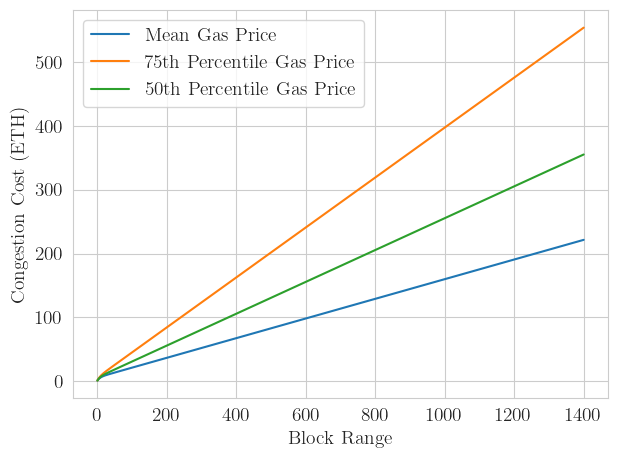

In [16]:
# plot the escrow cost per block range per each the mean gas price and the mean base fee per gas
escrow_costs_mean = []
escrow_costs_high = []
escrow_costs_med = []
RANGE = 1400
for block_range in range(1, RANGE):
    cost = calculate_congestion_cost(ESCROW, block_range, mean_gas_price, 30e6, mean_base_fee_per_gas)
    high_cost = calculate_congestion_cost(ESCROW, block_range, comp_high_gas_price.mean(), 30e6, mean_base_fee_per_gas)
    med_cost = calculate_congestion_cost(ESCROW, block_range, comp_med_gas_price.mean(), 30e6, mean_base_fee_per_gas)
    escrow_costs_mean.append(cost)
    escrow_costs_high.append(high_cost)
    escrow_costs_med.append(med_cost)

# plot the escrow cost per block range per each the mean gas price and the mean base fee per gas

plt.plot(range(1, RANGE), escrow_costs_mean, label='Mean Gas Price')
plt.plot(range(1, RANGE), escrow_costs_high, label='75th Percentile Gas Price')
plt.plot(range(1, RANGE), escrow_costs_med, label='50th Percentile Gas Price')
plt.xlabel('Block Range')
plt.ylabel('Congestion Cost (ETH)')
# plt.title('Escrow Congestion Cost per Block Range')
plt.legend()
plt.grid(True)

# Adjust font sizes for a technical paper
plt.rcParams.update({'font.size': FONT_SIZE, 'font.family': 'serif', 'font.serif': 'Times New Roman', 'text.usetex': True})

plt.tight_layout()  # Add padding to the plot
plt.savefig('./plots/escrow_congestion_cost.png', dpi=300)  # Save the plot as an image
plt.show()

In [11]:
calculate_congestion_cost(ESCROW, 7200, comp_high_gas_price.mean(), 30e6, mean_base_fee_per_gas)

2828.018751046124

1. 14527758: Vayner Sports Pass Purchase
2. 14596875: 0xStudio GPass Token Mint
3. 14598132: MoonBirds Token Mint
4. 14688877 - 14688903: OTHR Token Mint
5. 14714775: GHOST Token Mint
6. 15110688 & 15110689: SAUD Token Mint
7. 15259103: TODO: Get the transactions and check them
8. 15782459: 0x4a84d0872887f91546cd5400cf99763b654975efb3376ee55e4463bcfbca4e97 TX with absurdly high tx fee used for cancelling an old transaction request with reward of over 60 ETH.
9. 15890545 - 15890549: Keeper NFT Mint
10. 16134775: Premint to 0xC178994cB9b66307Cd62dB8b411759Dd36D9C2EE
11. 16334479 - 16334483: Reserve 0xdA7fB91545545D044a9fD118F85A4f10a8d4c6B5
12. 16492194: Mint 0x44e94034AFcE2Dd3CD5Eb62528f239686Fc8f162
13. 16813439 - 16813442: Mint NFTs for BrainDrops
14. 17214239: 3 Txs that swapped ETH with FOUR token?
15. 17241275: Multi block arbitrage by 0xA1ad9751882466b98725433C57790233fbB6ff53
16. 17337207: many transfers to 0x2D1AEB67E7274499c73f183aC26537B72273F678 which swaps POO token for ETH
17. 17571782: Azuki Mint

https://etherscan.io/tx/0x25cce7bb6ad744fb172e94aba27ce4ad5a07472cb473ffea7f450fce64e0ebc9/advanced#eventlog
Creates many contracts to claim minted XEN tokens 

https://etherscan.io/tx/0x70509cba3d1626ba751ccd051c63a872fd0d53e4d1084f7136af62c18cd70ddc#eventlog
https://etherscan.io/tx/0xd2e98c5cc3b9062cd98adac59b2cf0dd241d999fb110ab2b657e9f2817dbc1c5#eventlog
https://etherscan.io/tx/0xea276748ab6d8d0db28348def37415fec579070d61cacfc72f326092a7f63e2c#eventlog
https://etherscan.io/tx/0xe243d10ae2ad0478846c9898adfe6cb9b0be89f4f5f9c56a1bb54f3009d8e55a#eventlog
https://etherscan.io/tx/0x288039f966b42e32992d5853c2ed13c83ac2f159babdb749dd67ea3b32f015f5#eventlog
https://etherscan.io/tx/0xb582d150ea34235d2fa9be6555425809ecd5fc6d159d3e3a37d073f8f9942ad6#eventlog
https://etherscan.io/tx/0xa063e375ac57f41e3f99f31f5659b3109400c306845434778639d4b35e34f0fb#eventlog
https://etherscan.io/tx/0xef19003caf99c7f6283eddd59808abeb47182bcc22089eb5a0b16f10ef854de3#eventlog
https://etherscan.io/tx/0xa4f474584487aa9fabf2d46b1af362ff9209e4bf9c52f6d37a26d315b2c628c6#eventlog
https://etherscan.io/tx/0xc48b852450167111b777b8dfe040d4bf1206a99863170d1b4aabac1284730b38#eventlog
https://etherscan.io/tx/0x564d755e97a4794044b5aef0283ec741cf9b5efe7b05373ffd16cda2cd6c84f9#eventlog
https://etherscan.io/tx/0xcfc1329239212ae194db39486cec8f911f218d2b1a40a504b352e8c399e2e2b8#eventlog
https://etherscan.io/tx/0x6e2aa35c275aa6a344b3f48bdcb38ddafb584cc881f9ed24909f5291a1325f7c#eventlog
https://etherscan.io/tx/0xcb11a1ef913f45fa523aa4ef79b2f3975f4c83fcf9d9c30a7f90f18bcd33b41d#eventlog

These claim ranks for XEN